In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import warnings
import numpy as np

from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")

### Propaganda

##### Análise descritiva

In [37]:
# Lendo o arquivo CSV
propaganda = pd.read_csv('1 - propaganda.csv')

In [38]:
# Mostrando as primeiras linhas do DataFrame
propaganda.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [39]:
# Mostrando as últimas linhas do DataFrame
propaganda.tail()

,TV,Radio,Jornal,Vendas
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [40]:
# Dimensão do DataFrame
propaganda.shape

(200, 4)

In [41]:
# Verificando os tipos de dados das colunas
propaganda.dtypes

TV        float64
Radio     float64
Jornal    float64
Vendas    float64
dtype: object

In [42]:
# Verificar nulos
propaganda.isnull().sum()

TV        0
Radio     0
Jornal    0
Vendas    0
dtype: int64

In [43]:
# Tabela descritiva
propaganda.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Jornal,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Vendas,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


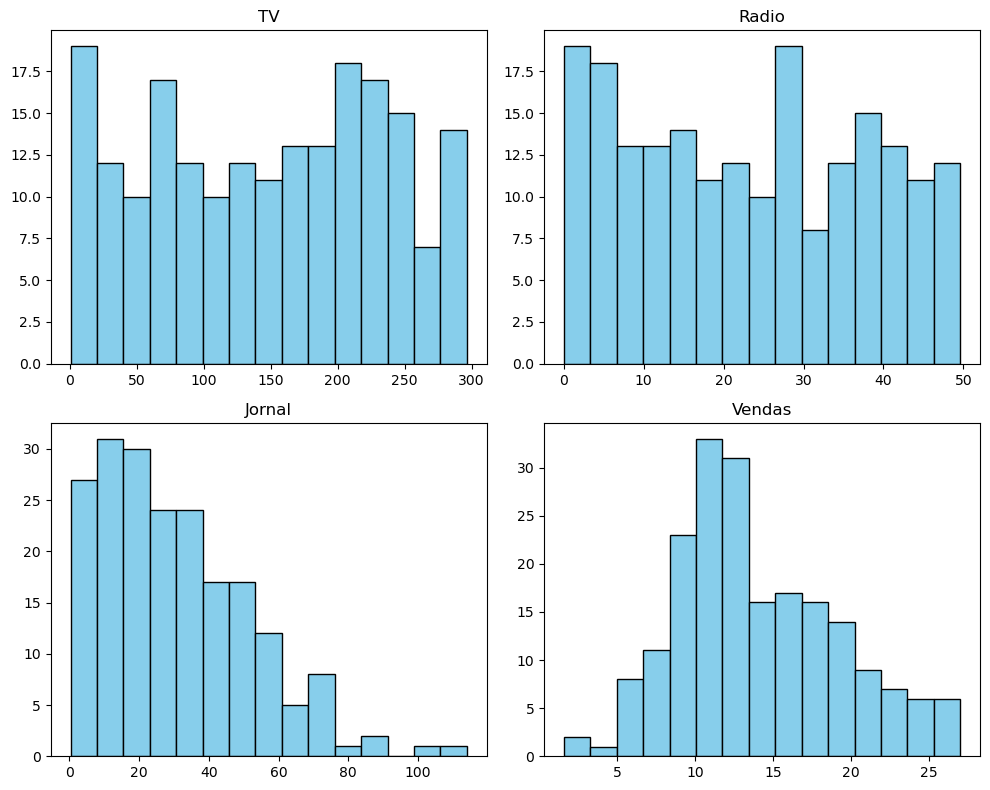

In [44]:
# Histograma das variáveis 
propaganda.hist(bins=15, figsize=(10,8), grid=False, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


##### Calculo de correlação e covariancia

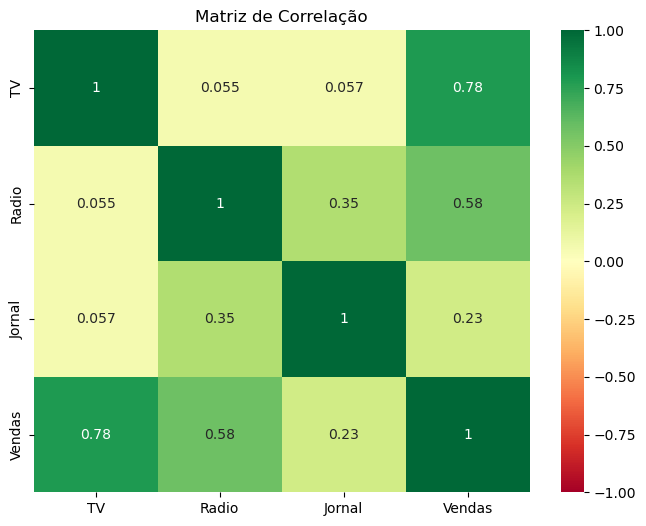

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Jornal,0.056648,0.354104,1.000000,0.228299
Vendas,0.782224,0.576223,0.228299,1.000000


In [45]:
# Correlações entre variáveis
corr = propaganda.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="RdYlGn", vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.show()
corr

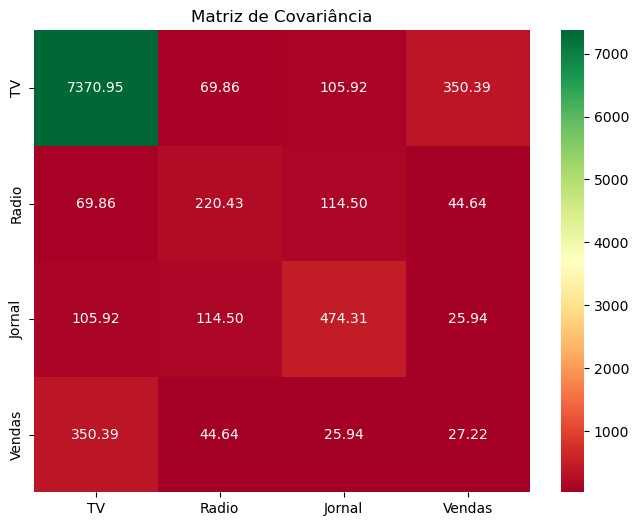

,TV,Radio,Jornal,Vendas
TV,7370.949893,69.862492,105.919452,350.390195
Radio,69.862492,220.427743,114.496979,44.635688
Jornal,105.919452,114.496979,474.308326,25.941392
Vendas,350.390195,44.635688,25.941392,27.221853


In [46]:
# Correlações entre variáveis
cov = propaganda.cov()
plt.figure(figsize=(8,6))
sns.heatmap(cov, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Matriz de Covariância")
plt.show()
cov


##### Modelo de regressão

In [48]:
X = propaganda[["TV", "Radio", "Jornal"]]
y = propaganda["Vendas"]

# adicionar constante (intercepto)
X_const = sm.add_constant(X)

modelo = sm.OLS(y, X_const).fit()

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.58e-96
Time:                        23:01:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

##### Análise de resíduos

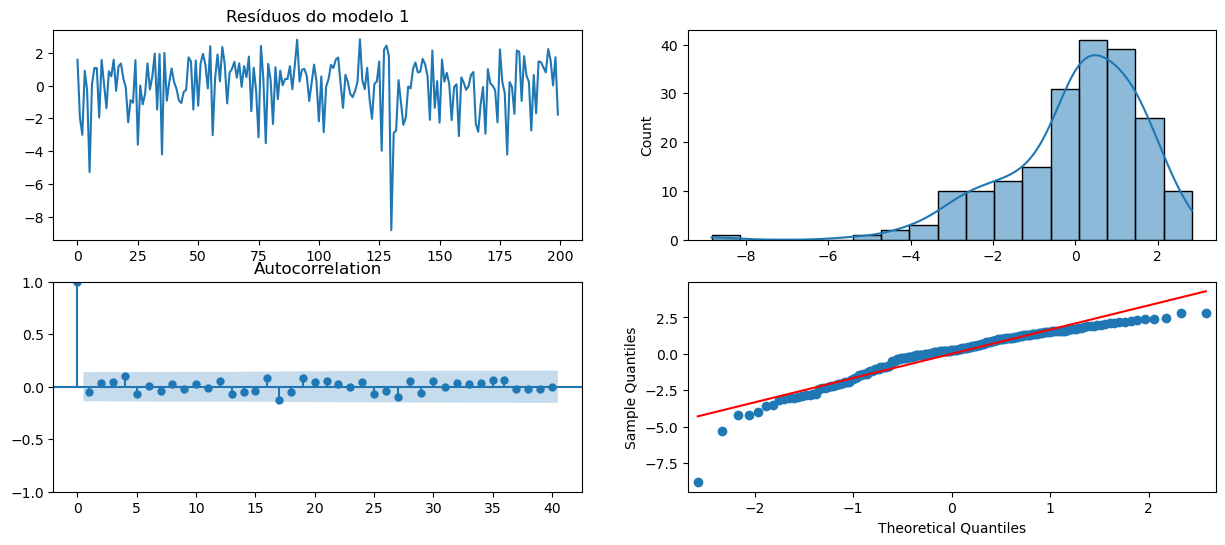

In [49]:
residuos = modelo.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos.plot(title="Resíduos do modelo 1", ax=ax[0][0])
sns.histplot(residuos,ax=ax[0][1], kde=True)
plot_acf(residuos,lags=40, ax=ax[1][0])
qqplot(residuos,line='s', ax=ax[1][1]);

In [50]:
estatistica_shapiro,p_shapiro = stats.shapiro(modelo.resid)
print(f'Estatísticas de teste: {format(estatistica_shapiro)}')
print('p-valor: {}'.format(p_shapiro))

Estatísticas de teste: 0.9176652036187539
p-valor: 3.938571556266626e-09


Text(0.5, 1.0, 'Homocedasticidade - Modelo 1 - Full')

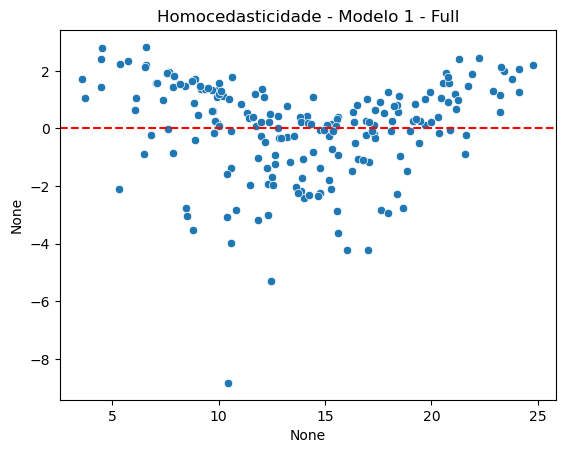

In [51]:
# Gráfico de homocedasticidade
sns.scatterplot(x=modelo.fittedvalues, y=residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Modelo 1 - Full')

##### Análise de multicolineariedade

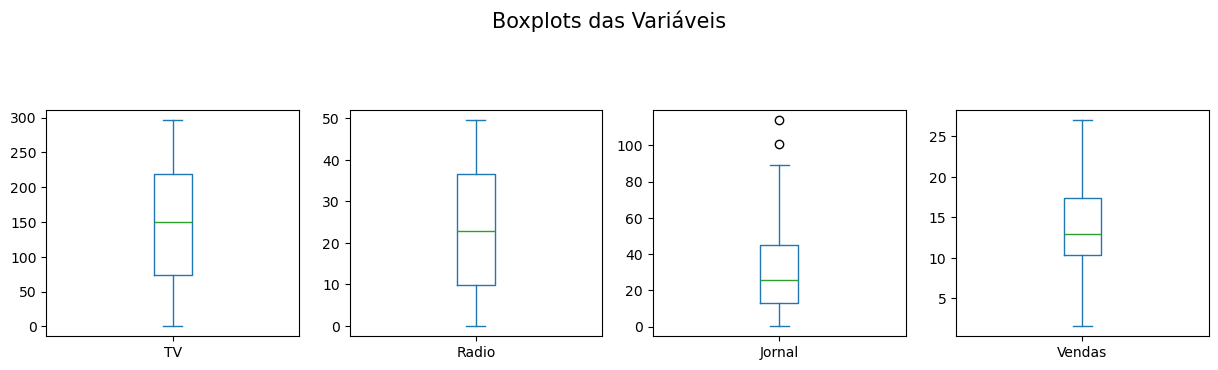

In [52]:
# Boxplot das variáveis numéricas
propaganda.plot(kind='box', subplots=True, layout=(3,4), figsize=(15,10))
plt.suptitle('Boxplots das Variáveis', size=15);

In [53]:
X_vif = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["variavel"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

vif_data

,variavel,VIF
0,const,6.848900
1,TV,1.004611
2,Radio,1.144952
3,Jornal,1.145187


##### Análise do modelo

In [93]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           1.58e-96
Time:                        22:24:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

|R²|R² ajustado|
|--|--|
|0.897|0.896|

Indica que aproximadamente 89,6% da variabilidade das vendas é explicada pelos investimentos em mídia.

F-statistic = 570,3 com p < 0,0001, significa que o modelo é altamente significativo.

| Variável | Coeficiente                                                                                                                                 |
| ----------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Intercepto (2.9389)** | Valor esperado das vendas quando todos os investimentos são zero.                                                                                                                             |               |
| **TV (0.0458)**         | **Cada 1 unidade monetária investida em TV aumenta as vendas em 0.0458 unidades**, mantendo as demais variáveis constantes. É o preditor mais forte.                                          |               |
| **Rádio (0.1885)**      | **Cada 1 unidade investida em Rádio aumenta as vendas em 0.1885 unidades.** Apesar de numericamente maior, o investimento típico em Rádio é muito menor, portanto o impacto total é moderado. |               |
| **Jornal (-0.0010)**    | Efeito praticamente nulo. **P-valor = 0.860**, indicando ausência total de significância estatística.                                                                                         |               |



### Preço carro

In [23]:
base = pd.read_csv('preco_carro.csv')

##### Tabela descritiva

In [51]:
base.describe().T

,count,mean,std,min,25%,50%,75%,max
v.id,1000.0,500.5000,288.819436,1.0,250.75,500.50,750.250,1000.0
on road old,1000.0,601648.2860,58407.246204,500265.0,548860.50,601568.00,652267.250,699859.0
on road now,1000.0,799131.3970,57028.950200,700018.0,750997.75,798168.00,847563.250,899797.0
years,1000.0,4.5610,1.719079,2.0,3.00,5.00,6.000,7.0
km,1000.0,100274.4300,29150.463233,50324.0,74367.50,100139.50,125048.000,149902.0
rating,1000.0,2.9880,1.402791,1.0,2.00,3.00,4.000,5.0
condition,1000.0,5.5920,2.824449,1.0,3.00,6.00,8.000,10.0
economy,1000.0,11.6250,2.230549,8.0,10.00,12.00,13.000,15.0
top speed,1000.0,166.8930,19.288380,135.0,150.00,166.00,184.000,200.0
hp,1000.0,84.5460,20.516940,50.0,67.00,84.00,102.000,120.0


In [ ]:
base.shape

(1000, 12)

In [ ]:
base.isna().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [ ]:
base.dtypes

v.id               int64
on road old        int64
on road now        int64
years              int64
km                 int64
rating             int64
condition          int64
economy            int64
top speed          int64
hp                 int64
torque             int64
current price    float64
dtype: object

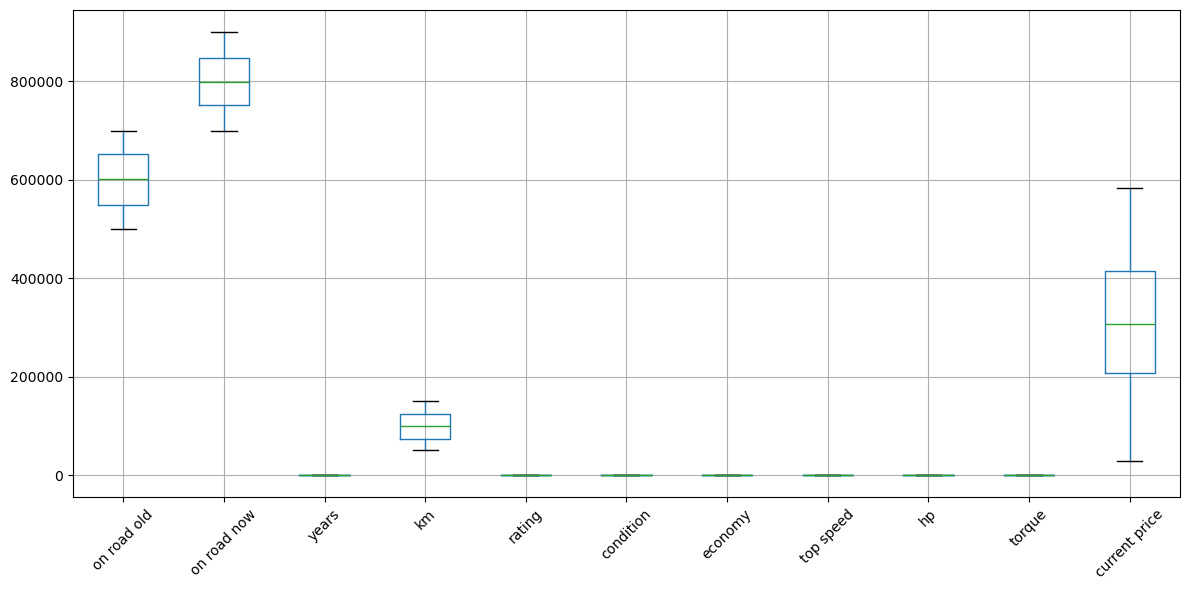

In [24]:
num_cols = ['on road old', 'on road now', 'years', 'km', 
            'rating', 'condition', 'economy', 
            'top speed', 'hp', 'torque', 'current price']

plt.figure(figsize=(12, 6))
base[num_cols].boxplot(rot=45)
plt.tight_layout()
plt.show()


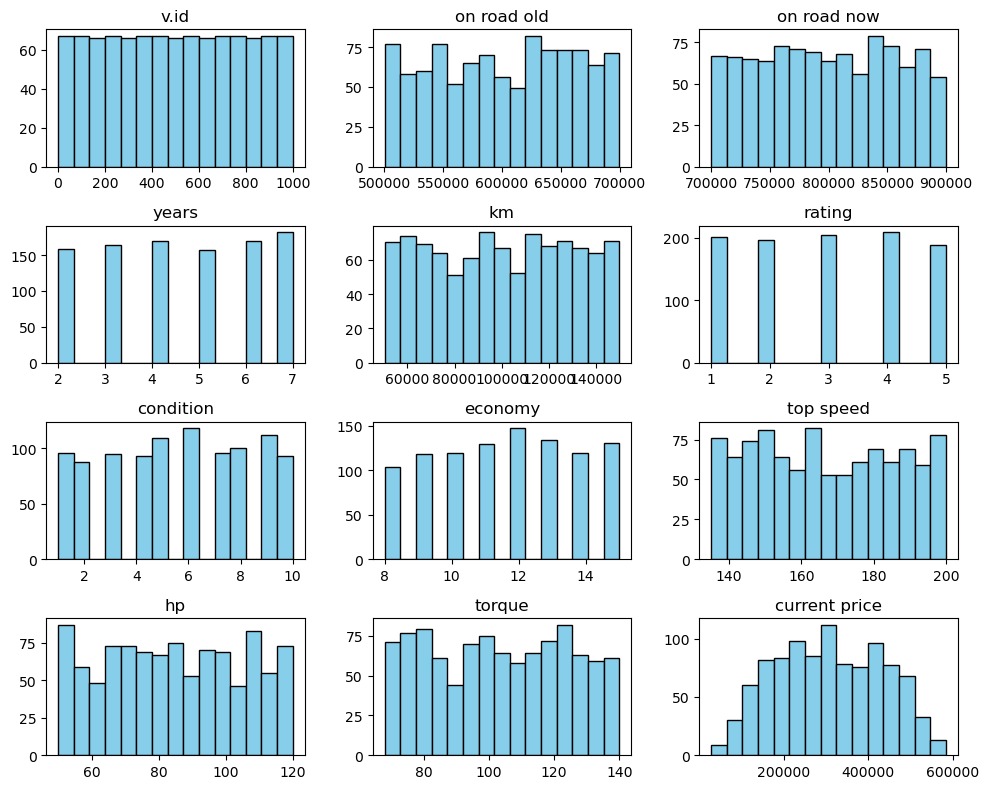

In [ ]:
# Histograma das variáveis 
base.hist(bins=15, figsize=(10,8), grid=False, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


##### Matriz de correlação

In [27]:
corr = base[num_cols].corr()
corr

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
on road old,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238
torque,0.008950,0.017955,0.028859,0.013566,0.004408,0.047805,0.041632,-0.019697,-0.013817,1.000000,-0.002290


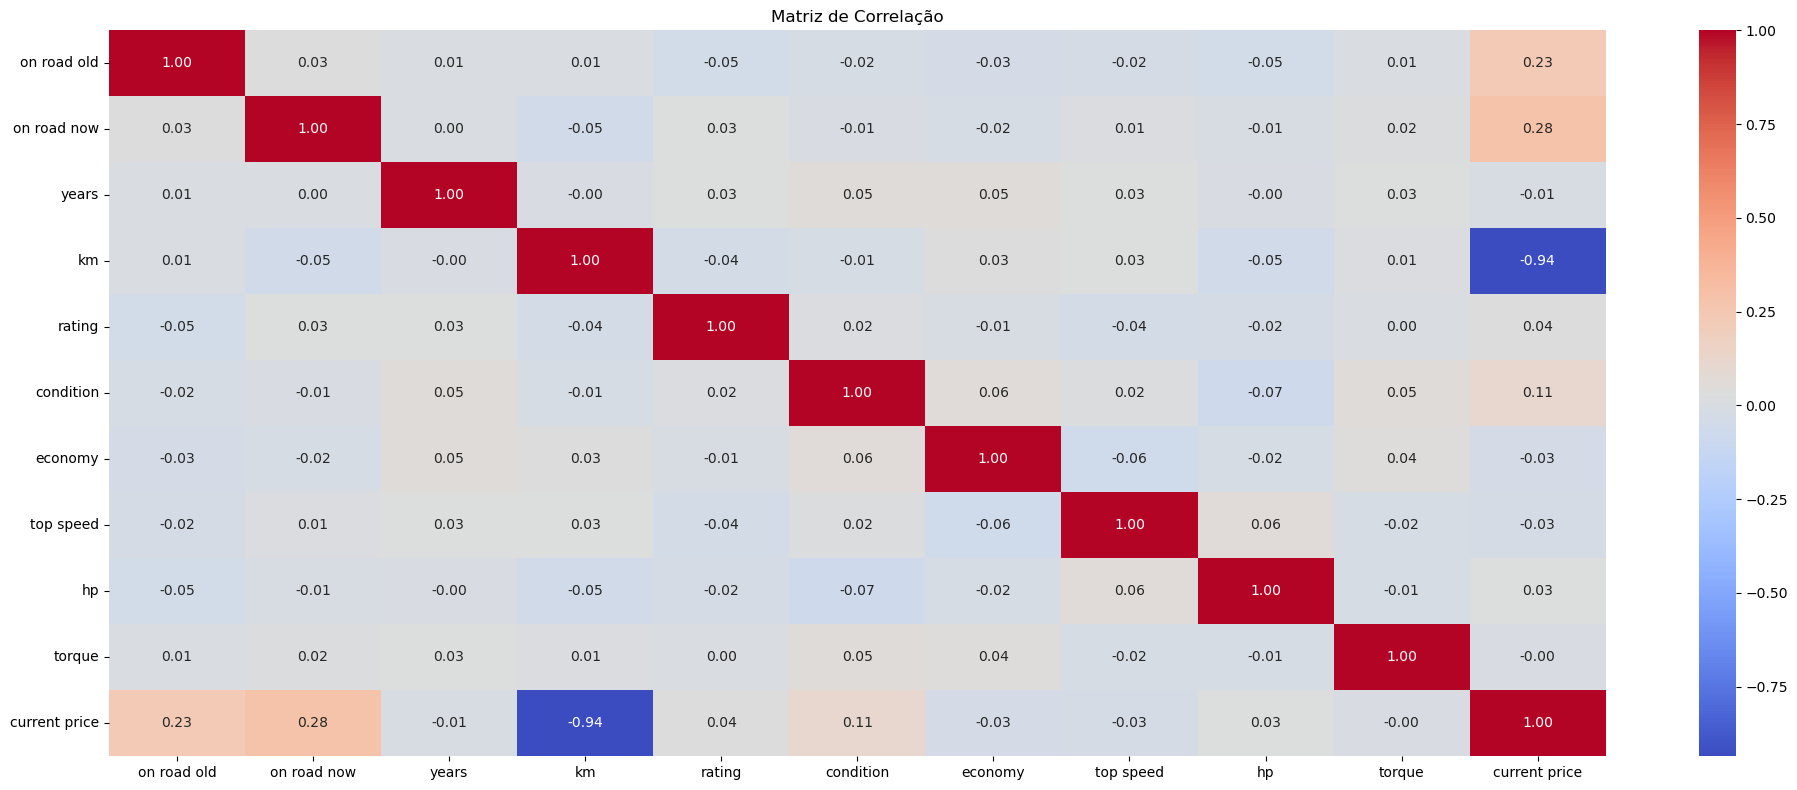

In [28]:
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()


In [52]:
cov = base[num_cols].cov()
cov


,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
on road old,3.411406e+09,1.136275e+08,723.631185,1.274980e+07,-4155.436004,-2587.026338,-3921.005756,-26830.347746,-59037.689846,11008.687710,1.715974e+09
on road now,1.136275e+08,3.252301e+09,451.837120,-8.844456e+07,2262.387151,-812.382406,-2020.082207,13969.286766,-14882.559321,21563.603673,2.033231e+09
years,7.236312e+02,4.518371e+02,2.955234,-1.046949e+02,0.065798,0.260148,0.192568,0.833861,-0.115421,1.044742,-2.569170e+03
km,1.274980e+07,-8.844456e+07,-104.694925,8.497495e+08,-1632.826667,-1123.013574,2124.906156,14872.065075,-31649.363143,8327.856967,-3.439609e+09
rating,-4.155436e+03,2.262387e+03,0.065798,-1.632827e+03,1.967824,0.063167,-0.030531,-1.142426,-0.651099,0.130206,6.196546e+03
condition,-2.587026e+03,-8.123824e+02,0.260148,-1.123014e+03,0.063167,7.977514,0.370370,1.006350,-4.146378,2.843427,3.920823e+04
economy,-3.921006e+03,-2.020082e+03,0.192568,2.124906e+03,-0.030531,0.370370,4.975350,-2.555681,-0.768018,1.955581,-9.761051e+03
top speed,-2.683035e+04,1.396929e+04,0.833861,1.487207e+04,-1.142426,1.006350,-2.555681,372.041593,22.884306,-8.000740,-6.807131e+04
hp,-5.903769e+04,-1.488256e+04,-0.115421,-3.164936e+04,-0.651099,-4.146378,-0.768018,22.884306,420.944829,-5.969928,7.821565e+04
torque,1.100869e+04,2.156360e+04,1.044742,8.327857e+03,0.130206,2.843427,1.955581,-8.000740,-5.969928,443.469541,-6.079438e+03


In [29]:
# Correlação com a variável resposta
corr_target = corr['current price'].drop('current price').sort_values(ascending=False)
print("Correlação com current price:")
print(corr_target)


Correlação com current price:
on road now    0.282793
on road old    0.233035
condition      0.110108
rating         0.035038
hp             0.030238
torque        -0.002290
years         -0.011854
top speed     -0.027993
economy       -0.034711
km            -0.935924
Name: current price, dtype: float64


In [43]:
top3 = corr_target[['km', 'on road now', 'on road old']].index.tolist() #.head(2).index.tolist()
top5 = corr_target[['km', 'on road now', 'on road old', 'condition', 'rating']].index.tolist() #.head(4).index.tolist()

print("Top 3:", top3)
print("Top 5:", top5)


Top 3: ['km', 'on road now', 'on road old']
Top 5: ['km', 'on road now', 'on road old', 'condition', 'rating']


##### Modelos de regressão

In [44]:
y = base['current price']
X1 = base.drop(columns=['v.id', 'current price'])
X2 = base[top3]
X3 = base[top5]


In [45]:
X1_const = sm.add_constant(X1)
X2_const = sm.add_constant(X2)
X3_const = sm.add_constant(X3)

model1 = sm.OLS(y, X1_const).fit()
model2 = sm.OLS(y, X2_const).fit()
model3 = sm.OLS(y, X3_const).fit()

In [46]:
print('---' * 10, 'Modelo com todas as variáveis explicativas numéricas', '---' * 10)
print(model1.summary())


------------------------------ Modelo com todas as variáveis explicativas numéricas ------------------------------
                            OLS Regression Results                            
Dep. Variable:          current price   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.072e+04
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        23:56:04   Log-Likelihood:                -10488.
No. Observations:                1000   AIC:                         2.100e+04
Df Residuals:                     989   BIC:                         2.105e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [47]:
print('---' * 10, 'Modelo com as três variáveis mais correlacionadas', '---' * 10)
print(model2.summary())


------------------------------ Modelo com as três variáveis mais correlacionadas ------------------------------
                            OLS Regression Results                            
Dep. Variable:          current price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.079e+04
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        23:56:08   Log-Likelihood:                -11087.
No. Observations:                1000   AIC:                         2.218e+04
Df Residuals:                     996   BIC:                         2.220e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [48]:
print('---' * 10, 'Modelo com as cinco variáveis mais correlacionadas', '---' * 10)
print(model3.summary())

------------------------------ Modelo com as cinco variáveis mais correlacionadas ------------------------------
                            OLS Regression Results                            
Dep. Variable:          current price   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.763e+04
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        23:56:13   Log-Likelihood:                -10539.
No. Observations:                1000   AIC:                         2.109e+04
Df Residuals:                     994   BIC:                         2.112e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------

##### Análise de resíduos

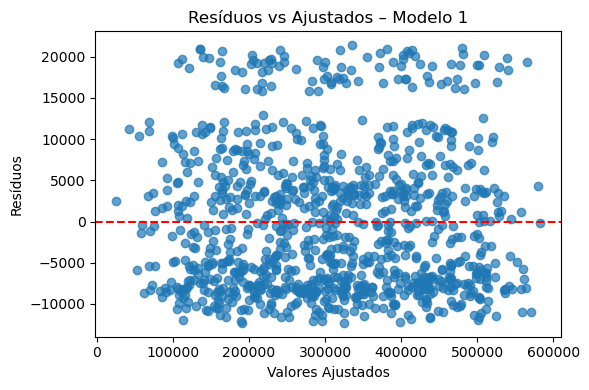

In [55]:
resid1 = model1.resid
fitted1 = model1.fittedvalues

plt.figure(figsize=(6, 4))
plt.scatter(fitted1, resid1, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Ajustados – Modelo 1")
plt.tight_layout()
plt.show()


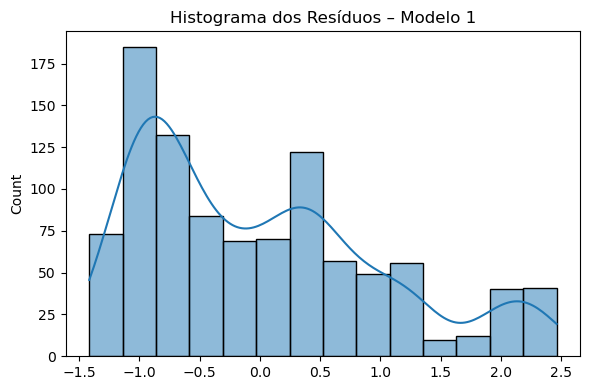

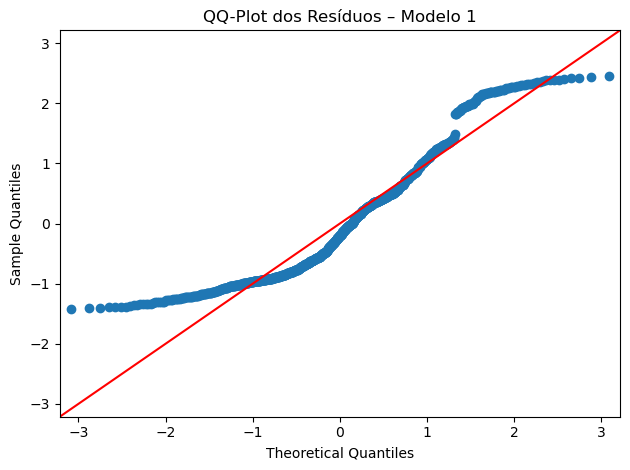

Estatística W = 0.9198159505810868
p-valor = 1.2893249749910165e-22


In [98]:
resid_pad = (resid1 - np.mean(resid1)) / np.std(resid1)

plt.figure(figsize=(6, 4))
sns.histplot(resid_pad, kde=True)
plt.title("Histograma dos Resíduos – Modelo 1")
plt.tight_layout()
plt.show()

sm.qqplot(resid_pad, line='45')
plt.title("QQ-Plot dos Resíduos – Modelo 1")
plt.tight_layout()
plt.show()

stat, p = shapiro(resid1)
print(f"Estatística W = {stat}")
print(f"p-valor = {p}")

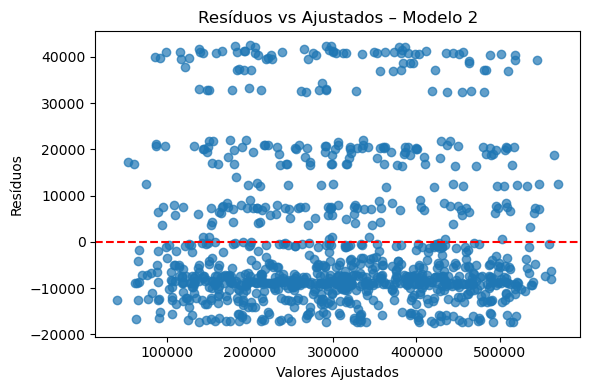

In [63]:
resid2 = model2.resid
fitted2 = model2.fittedvalues

plt.figure(figsize=(6, 4))
plt.scatter(fitted2, resid2, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Ajustados – Modelo 2")
plt.tight_layout()
plt.show()

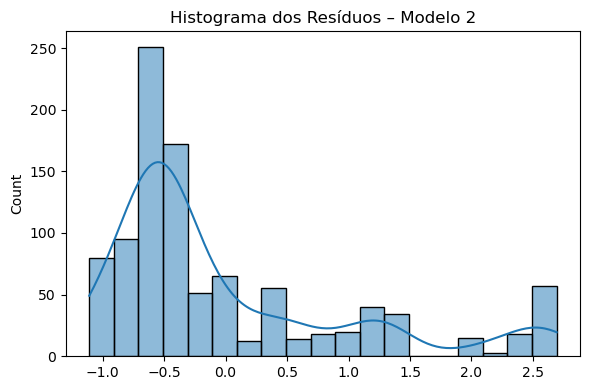

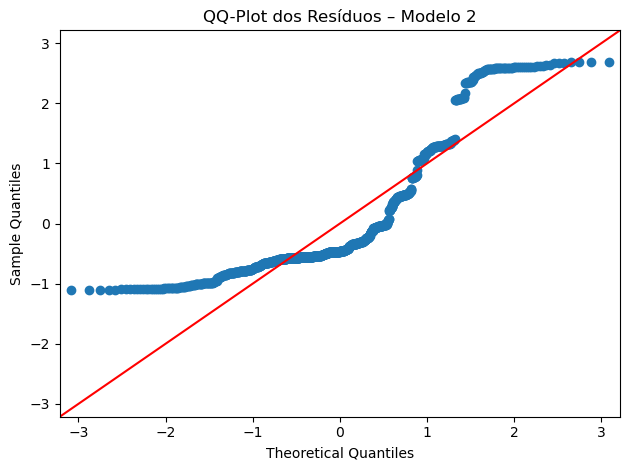

Estatística W = 0.8016703219486013
p-valor = 2.9271358232486935e-33


In [97]:
resid_pad = (resid2 - np.mean(resid2)) / np.std(resid2)

plt.figure(figsize=(6, 4))
sns.histplot(resid_pad, kde=True)
plt.title("Histograma dos Resíduos – Modelo 2")
plt.tight_layout()
plt.show()

sm.qqplot(resid_pad, line='45')
plt.title("QQ-Plot dos Resíduos – Modelo 2")
plt.tight_layout()
plt.show()

stat, p = shapiro(resid2)
print(f"Estatística W = {stat}")
print(f"p-valor = {p}")

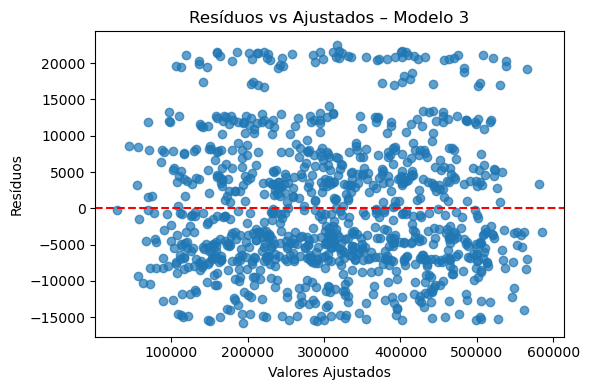

In [65]:
resid3 = model3.resid
fitted3 = model3.fittedvalues

plt.figure(figsize=(6, 4))
plt.scatter(fitted3, resid3, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Ajustados – Modelo 3")
plt.tight_layout()
plt.show()

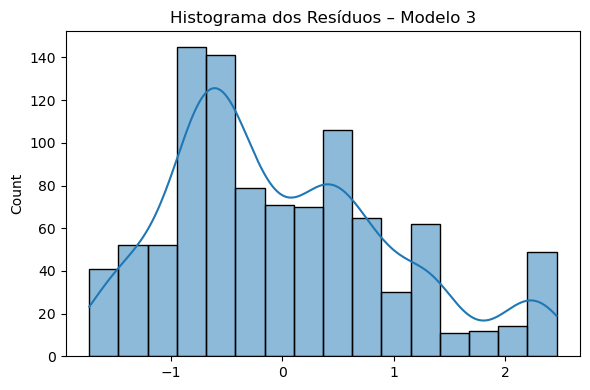

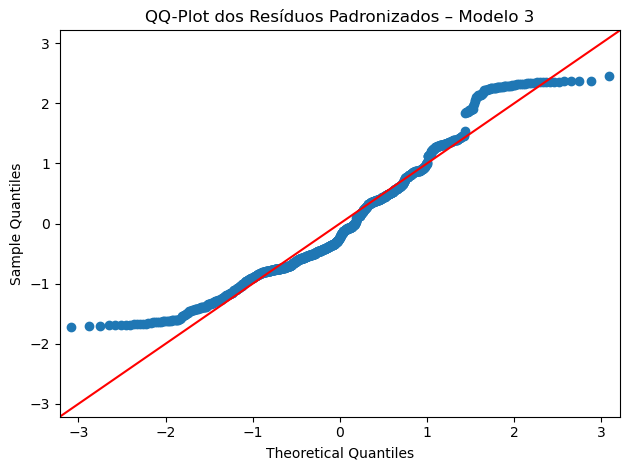

Estatística W = 0.9553046658770772
p-valor = 6.778126355533105e-17


In [96]:
resid_pad = (resid3 - np.mean(resid3)) / np.std(resid3)

plt.figure(figsize=(6, 4))
sns.histplot(resid_pad, kde=True)
plt.title("Histograma dos Resíduos – Modelo 3")
plt.tight_layout()
plt.show()

sm.qqplot(resid_pad, line='45')
plt.title("QQ-Plot dos Resíduos Padronizados – Modelo 3")
plt.tight_layout()
plt.show()

stat, p = shapiro(resid3)
print(f"Estatística W = {stat}")
print(f"p-valor = {p}")


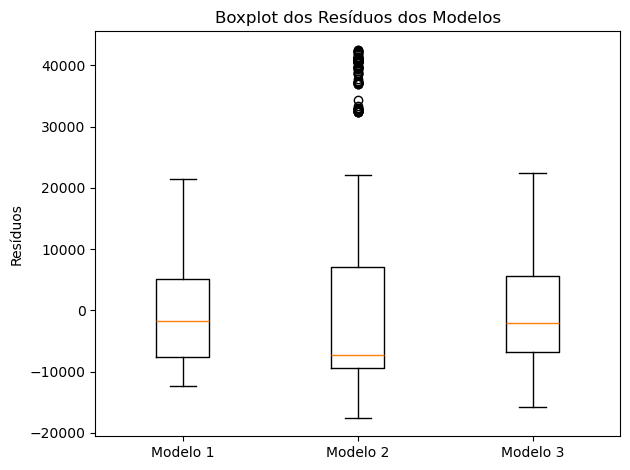

In [90]:
plt.boxplot([resid1, resid2, resid3], labels=['Modelo 1', 'Modelo 2', 'Modelo 3'])
plt.title("Boxplot dos Resíduos dos Modelos")
plt.ylabel("Resíduos")
plt.tight_layout()
plt.show()

##### Análise de Multicolinearidade

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calcular_vif(X):
    X_const = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Variavel"] = X_const.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X_const.values, i)
        for i in range(X_const.shape[1])
    ]
    return vif_data


In [61]:
vif1 = calcular_vif(X1)
vif2 = calcular_vif(X2)
vif3 = calcular_vif(X3)

print("\nVIF – Modelo 1")
print(vif1)

print("\nVIF – Modelo 2")
print(vif2)

print("\nVIF – Modelo 3")
print(vif3)



VIF – Modelo 1
       Variavel         VIF
0         const  479.327661
1   on road old    1.008517
2   on road now    1.005861
3         years    1.007445
4            km    1.009872
5        rating    1.008609
6     condition    1.014647
7       economy    1.013642
8     top speed    1.012291
9            hp    1.015192
10       torque    1.005507

VIF – Modelo 2
      Variavel         VIF
0        const  311.077653
1           km    1.002926
2  on road now    1.004038
3  on road old    1.001252

VIF – Modelo 3
      Variavel         VIF
0        const  321.815858
1           km    1.004556
2  on road now    1.004858
3  on road old    1.004120
4    condition    1.000676
5       rating    1.005162


##### Análise de Outliers

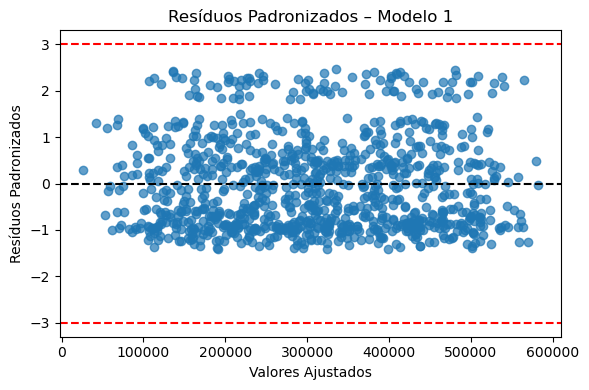

In [62]:
influence1 = model1.get_influence()
std_resid1 = influence1.resid_studentized_internal

plt.figure(figsize=(6, 4))
plt.scatter(fitted1, std_resid1, alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.axhline(3, color='red', linestyle='--')
plt.axhline(-3, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos Padronizados")
plt.title("Resíduos Padronizados – Modelo 1")
plt.tight_layout()
plt.show()


In [ ]:
stat, p = shapiro(residuos1)

print(f"Estatística W = {stat}")
print(f"p-valor = {p}")

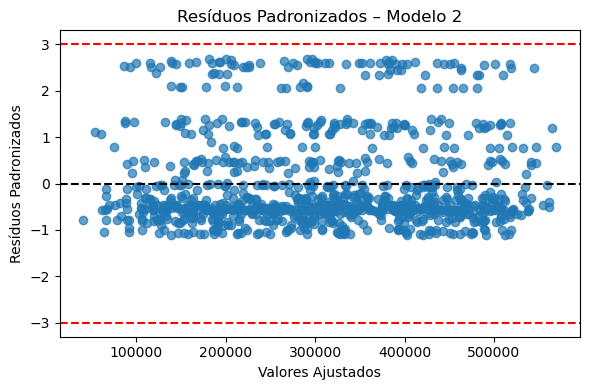

In [67]:
influence2 = model2.get_influence()
std_resid2 = influence2.resid_studentized_internal

plt.figure(figsize=(6, 4))
plt.scatter(fitted2, std_resid2, alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.axhline(3, color='red', linestyle='--')
plt.axhline(-3, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos Padronizados")
plt.title("Resíduos Padronizados – Modelo 2")
plt.tight_layout()
plt.show()


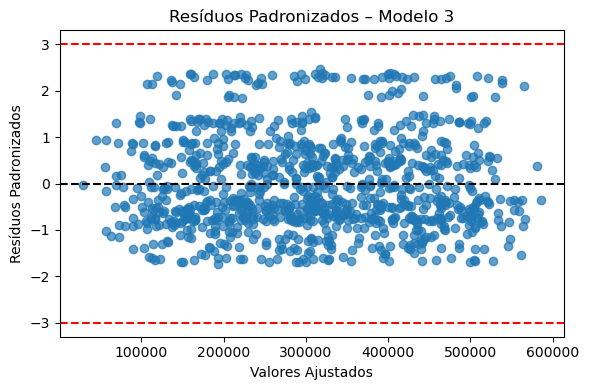

In [68]:
influence3 = model3.get_influence()
std_resid3 = influence3.resid_studentized_internal

plt.figure(figsize=(6, 4))
plt.scatter(fitted3, std_resid3, alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.axhline(3, color='red', linestyle='--')
plt.axhline(-3, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos Padronizados")
plt.title("Resíduos Padronizados – Modelo 3")
plt.tight_layout()
plt.show()


##### Comparação de modelos

In [71]:
def resumo_modelo(nome, modelo, y):
    fitted = modelo.fittedvalues
    resid = y - fitted
    rmse = np.sqrt(np.mean(resid**2))
    return {
        "Modelo": nome,
        "R2": modelo.rsquared,
        "R2_ajustado": modelo.rsquared_adj,
        "AIC": modelo.aic,
        "BIC": modelo.bic,
        "RMSE": rmse
    }

resumos = []
resumos.append(resumo_modelo("Modelo 1 - todas variáveis", model1, y))
resumos.append(resumo_modelo("Modelo 2 - top 3", model2, y))
resumos.append(resumo_modelo("Modelo 3 - top 5", model3, y))

df_resumo = pd.DataFrame(resumos)
df_resumo

,Modelo,R2,R2_ajustado,AIC,BIC,RMSE
0,Modelo 1 - todas variáveis,0.995250,0.995202,20998.600479,21052.585787,8685.078403
1,Modelo 2 - top 3,0.984279,0.984232,22181.364008,22200.995029,15799.656379
2,Modelo 3 - top 5,0.994745,0.994719,21089.490521,21118.937052,9134.436007
